## Homework 2
### Student Details
**Name:** Atul Parida<br>
**Student ID:** 1006184<br>
**Course ID** 50.007 Machine Learning (Summer 2023)<br>

### Instructions to run
Press *Run All* to run all cells for the given Jupyter notebook. This notebook was compiled using the Python 3.9.13 kernel.

### Common Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Question 2

In [2]:
### Import Data
import PIL as pil

data_path = os.path.join(os.path.curdir, 'HW2_data', '2', 'hw2_img.jpg')

# import image from data - format: rows x columns x RGB
img = pil.Image.open(data_path)
img = np.array(img)

# convert into 2D array - format: pixels x RGB
num_pixels = img.shape[0] * img.shape[1]
reshaped_img = img.reshape(num_pixels, 3)


In [3]:
class KMeans:
    def __init__(self, k, random_state=None):
        self.k = k
        self.random_state = random_state
        self.centroids = None
        self.cluster_labels = None
        self.cluster_counts = None

    def fit(self, X):
        np.random.seed(self.random_state)
        n_samples, _ = X.shape

        # Randomly initialize centroids
        random_indices = np.random.choice(n_samples, size=self.k, replace=False)
        self.centroids = X[random_indices]

        # Iterate until convergence
        prev_cluster_labels = None
        while True:
            # Assign each sample to the nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
            self.cluster_labels = np.argmin(distances, axis=1)

            # Check for convergence
            if np.array_equal(self.cluster_labels, prev_cluster_labels):
                break

            # Update centroids
            self.centroids = np.array([X[self.cluster_labels == i].mean(axis=0) for i in range(self.k)])

            prev_cluster_labels = self.cluster_labels

        # Calculate cluster counts
        self.cluster_counts = np.bincount(self.cluster_labels)


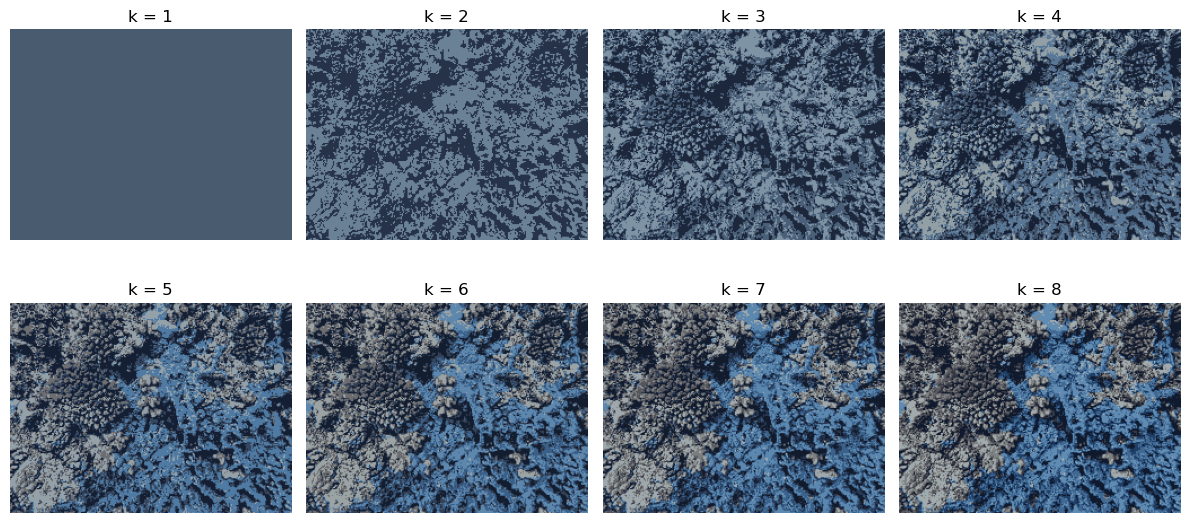

Number of clusters for k = 1: 1
Final centroids for k = 1:
[[ 73.34134759  91.12017112 111.98645989]]
Number of pixels associated with each cluster for k = 1:
[46750]
------------------------------
Number of clusters for k = 2: 2
Final centroids for k = 2:
[[107.35063855 129.59195474 150.06476975]
 [ 37.34340188  50.39879354  71.681564  ]]
Number of pixels associated with each cluster for k = 2:
[24039 22711]
------------------------------
Number of clusters for k = 3: 3
Final centroids for k = 3:
[[ 74.49994061  95.59514194 120.20049887]
 [ 28.24325973  39.65225082  59.98633646]
 [126.59106377 147.96404794 164.81839029]]
Number of pixels associated with each cluster for k = 3:
[16838 16394 13518]
------------------------------
Number of clusters for k = 4: 4
Final centroids for k = 4:
[[ 89.62869822 120.8239645  151.11211461]
 [ 23.08816545  33.9842972   54.11926465]
 [146.93486935 159.04878363 165.36710001]
 [ 63.79483259  78.63400092  99.61924782]]
Number of pixels associated with e

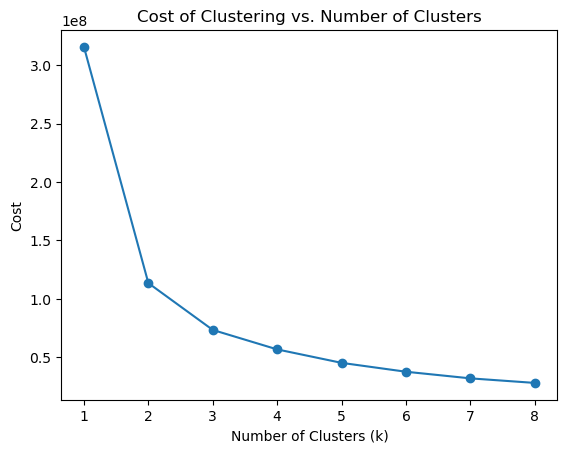

In [4]:
# Run KMeans for k = 1 to k = 8 on the image
k_values = range(1, 9)
results = []

for k in k_values:
    kmeans = KMeans(k=k, random_state=42)
    kmeans.fit(reshaped_img)

    centroids = kmeans.centroids
    cluster_labels = kmeans.cluster_labels
    cluster_counts = kmeans.cluster_counts

    results.append((k, centroids, cluster_labels, cluster_counts))

# Visualize the results
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i, (k, centroids, cluster_labels, _) in enumerate(results):
    clustered_image_array = centroids[cluster_labels]
    clustered_image = clustered_image_array.reshape(img.shape).astype(np.uint8)

    axes[i].imshow(clustered_image)
    axes[i].set_title(f"k = {k}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

# Print the requested information for each case
for k, centroids, cluster_labels, cluster_counts in results:
    print(f"Number of clusters for k = {k}: {len(np.unique(cluster_labels))}")
    print(f"Final centroids for k = {k}:\n{centroids}")
    print(f"Number of pixels associated with each cluster for k = {k}:\n{cluster_counts}")
    print("-" * 30)

# Plot the cost of clustering as a function of k
costs = [np.sum((reshaped_img - centroids[labels]) ** 2) for _, centroids, labels, _ in results]
plt.plot(k_values, costs, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.title("Cost of Clustering vs. Number of Clusters")
plt.show()


### Question 5